In [43]:
import numpy as np
import pandas as pd
import datetime as dt
import pymongo
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from monmeta import meta

In [44]:
def getDF():
    print('within getDF')
    metadata = meta()
    URI = metadata[2]
    username = metadata[0]
    password = metadata[1]
    db = metadata[3]
    db_collection = metadata[4]
    try:
        client = pymongo.MongoClient(URI)
        client_db = client[db]
        client_db.authenticate(username,password)
    except Exception:
            print("Fatal error in main loop")
    df = pd.DataFrame(list(client_db.db_collection.find())).tail(30)
    print(df.head(10))
    print('df loaded')
    #print(df['hostname'][0])
    #return df

In [45]:
getDF()

within getDF
Empty DataFrame
Columns: []
Index: []
df loaded


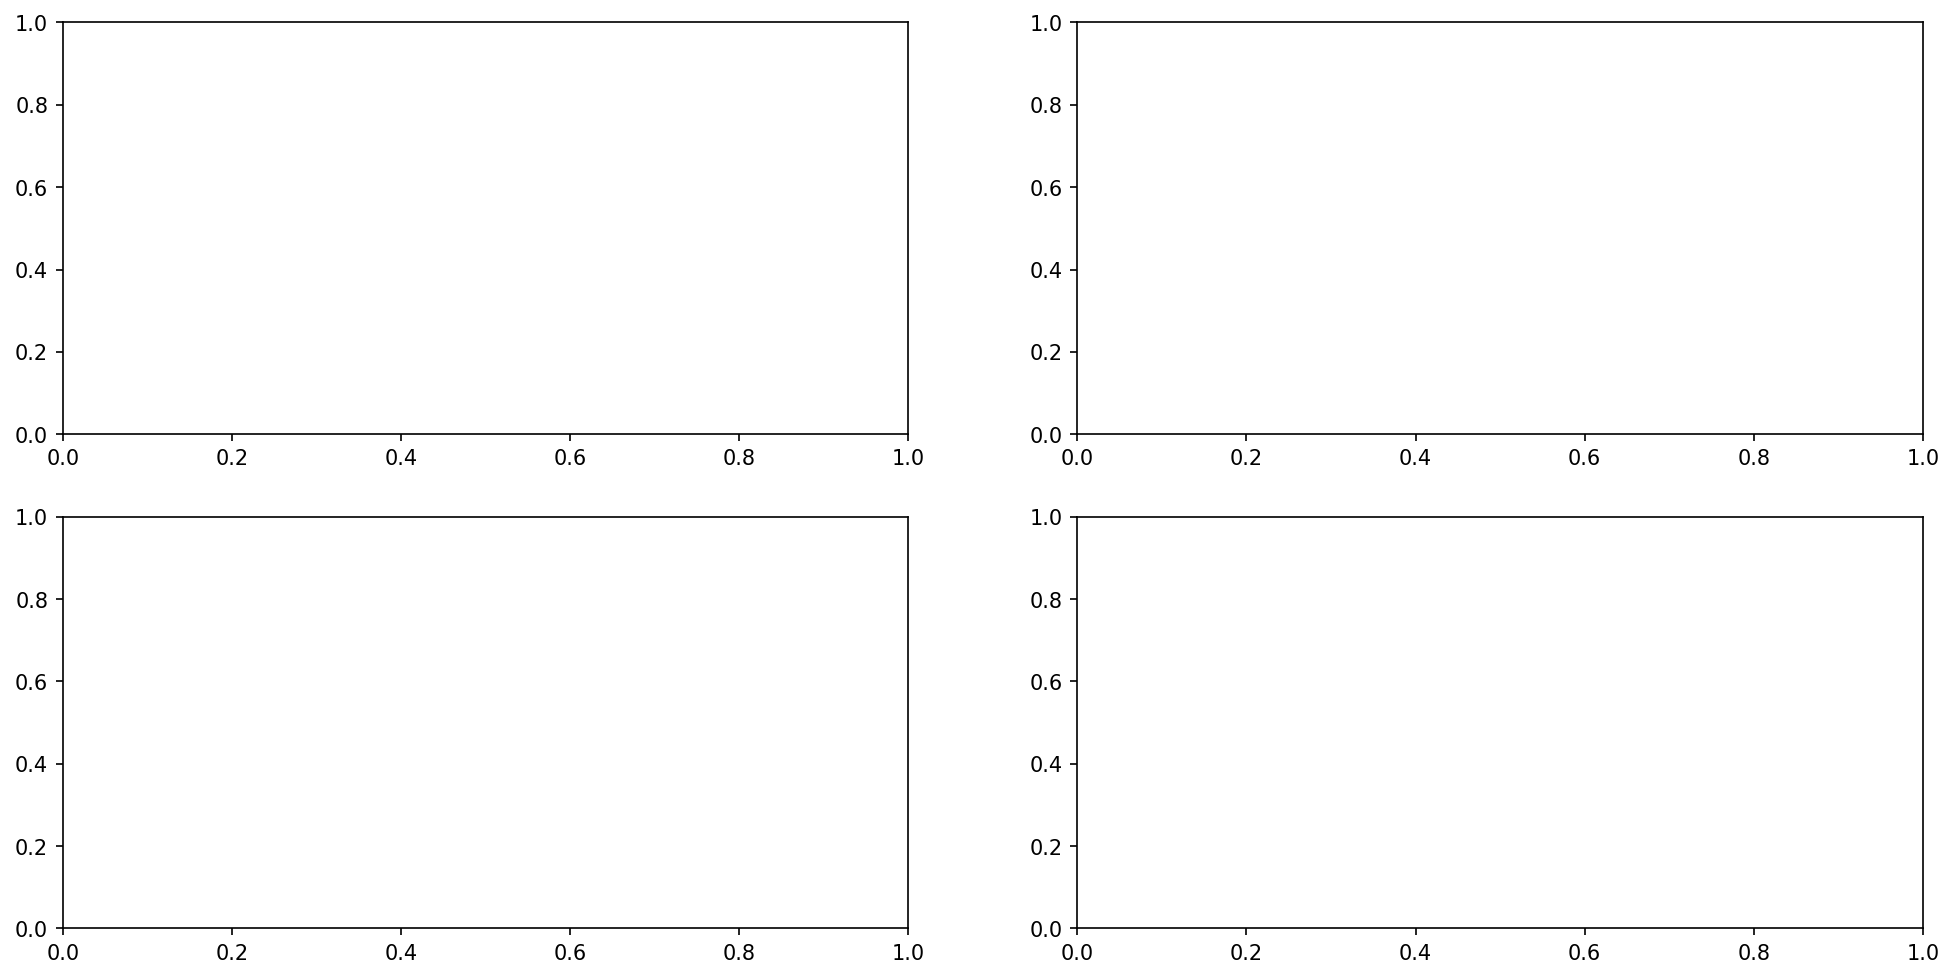

In [3]:
fig = plt.figure(figsize = (16,8), dpi = 150)

#creating a subplot 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [10]:
def animate(i):
    print('animate 1')
    data = getDF()
    xtime = data['start_time'].dt.strftime('%Y-%m-%d_%H:%M')
    ycpu = data['cpu']
    yload = data['load']
    ymemory = data['memory']
    ycpu0temp = data['cpu0temp']
    #lines = data.split('\n')
    #xs = []
    #ys = []
   
    #for line in lines:
    #    x, y = line.split(',') # Delimiter is comma    
    #    xs.append(float(x))
     #   ys.append(float(y))
    ###
    fig = plt.figure(figsize = (16,8), dpi = 150)

    #creating a subplot 
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    ###
    ax1.clear()
    ax1.plot(xtime, ycpu, 'tab:orange')
    ax1.grid(True, linestyle='-.')
    ax1.tick_params('x', labelrotation=45, labelcolor='r', labelsize=4, width=3)
    ax2.clear()
    ax2.plot(xtime, yload, 'tab:red')
    ax2.grid(True, linestyle='-.')
    ax2.tick_params('x', labelrotation=45, labelcolor='g', labelsize=4, width=3)
    ax3.clear()
    ax3.plot(xtime, ymemory, 'tab:green')
    ax3.grid(True, linestyle='-.')
    ax3.tick_params('x', labelrotation=45, labelcolor='r', labelsize=4, width=3) 
    ax4.clear()
    ax4.plot(xtime, ycpu0temp,  'tab:red')
    ax4.grid(True, linestyle='-.')
    ax4.tick_params('x', labelrotation=45, labelcolor='b', labelsize=4, width=3)
    

    #plt.xlabel('Date')
    #plt.ylabel('CPU')
    #plt.title('bluemoon')
    #ax1.set_xlim(0, 15)
    #ax1.set_ylim(0, 100)
    ax1.set_title("cpu load")
    ax1.set_xlabel('Date', loc='right' , fontsize=2)
    ax1.set_ylabel('CPU LOAD', loc='top' , fontsize=2)
    ax1.margins(0.02)
    #plt.subplots_adjust(bottom=0.30)
    #ax2.set_xlim(0, 15)
    #ax2.set_ylim(0, 100)
    ax2.set_title("system load")
    ax2.set_xlabel('Date', loc='right', fontsize=2)
    ax2.set_ylabel('SYS LOAD', loc='top' , fontsize=2)
    ax2.margins(0.02)  
    #ax3.set_xlim(0, 15)
    #ax3.set_ylim(0, 100)
    ax3.set_title("memory")
    ax3.set_xlabel('Date', loc='right' , fontsize=2)
    ax3.set_ylabel('MEM', loc='top' , fontsize=2)
    ax3.margins(0.02)
    #ax4.set_xlim(0, 15)
    #ax4.set_ylim(0, 100)
    ax4.margins(0.02)
    ax4.set_title('cpu0tmp')
    ax4.set_xlabel('Date', loc='right' , fontsize=2)
    ax4.set_ylabel('CPU TEMP', loc='top' , fontsize=2)
    #ax4.set_title("cpu0temp")
    ax1.use_sticky_edges = False
    ax2.use_sticky_edges = False
    ax3.use_sticky_edges = False
    ax4.use_sticky_edges = False
    

In [11]:
fig.tight_layout(pad=6.0)    
ani = animation.FuncAnimation(fig, animate, interval=20000) 
plt.show()